# Bitcoin Heist Classification

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f, ttest_ind
from sklearn import datasets
import datetime

In [20]:
#load data
data = pd.read_csv('BitcoinHeistData.csv')
data.rename(columns={'count':'counted'},inplace=True)
data.head()

,address,year,day,length,weight,counted,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


## Descriptive Information

In [3]:
#general information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   address    object 
 1   year       int64  
 2   day        int64  
 3   length     int64  
 4   weight     float64
 5   count      int64  
 6   looped     int64  
 7   neighbors  int64  
 8   income     float64
 9   label      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [41]:
len(np.unique(data['address']))

2631095

In [4]:
data.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [5]:
#check missing value
data.isnull().values.any()

False

In [6]:
#checking labels and their counts
data['label'].value_counts()

white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealGlobeImposter               55
montrealCryptoTorLocker2015         55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealXLockerv5.0                  7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw              

In [21]:
#Checking binary classification and divide the dataset into two classes
white = data.loc[data['label'] == 'white', ]
heist = data.loc[data['label'] != 'white', ]
print("Number of White Address (no ransomware identified): ", white.shape[0])
print("Number of Ransomware Address: ", heist.shape[0])
print("\nNumber of White Address in %: ", white.shape[0]/(white.shape[0]+heist.shape[0]))
print("Number of Ransomware Address in %: ", heist.shape[0]/(white.shape[0]+heist.shape[0]))

Number of White Address (no ransomware identified):  2875284
Number of Ransomware Address:  41413

Number of White Address in %:  0.9858014048082472
Number of Ransomware Address in %:  0.014198595191752863


In [6]:
white.head()

,address,year,day,length,weight,counted,looped,neighbors,income,label
41413,19snqSYnDSC4mDbv3pJuYgYqm5ctqwAxnm,2011,1,0,1.0,1,0,1,5.000000e+09,white
41414,1FeGY25MSKtnwVNGrnbwLsecBpBYrMQ6Kx,2011,1,0,1.0,1,0,2,5.000000e+09,white
41415,1A1nkBK7tfnVRtVbyiirEWRcayQtSTBCsW,2011,1,0,1.0,1,0,2,9.150000e+08,white
41416,18wHa1PLzoU4ToemBZn2czZbVEbyZJ2gSi,2011,1,0,1.0,1,0,2,3.402500e+10,white
41417,188sYyuK756uEsq5LTk9tiXyJHeEjxKT5c,2011,1,0,1.0,1,0,2,1.275100e+10,white


In [7]:
heist.head()

,address,year,day,length,weight,counted,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [17]:
data.groupby('year')['blabel'].value_counts()

year  blabel
2011  0.0       355284
      1.0           65
2012  0.0       365000
      1.0          714
2013  0.0       365000
      1.0         7494
2014  0.0       365000
      1.0        10319
2015  0.0       365000
      1.0         3701
2016  0.0       365000
      1.0        15631
2017  0.0       365000
      1.0         3486
2018  0.0       330000
      1.0            3
Name: blabel, dtype: int64

## Ransomware frequency

In [22]:
common_ransom_list = ['princetonCerber',
 'princetonLocky',
 'montrealCryptoLocker',
 'montrealCryptXXX',
 'paduaCryptoWall']
common_ransom_df = heist[heist['label'].isin(common_ransom_list)]

In [13]:
common_ransom_df['date'] = (np.asarray(common_ransom_df['year'], dtype='datetime64[Y]')-1970)+(np.asarray(common_ransom_df['day'], dtype='timedelta64[D]')-1)
common_ransom_df.head()

/Users/Sharonvy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,address,year,day,length,weight,counted,looped,neighbors,income,label,date
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber,2017-01-11
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky,2016-05-11
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber,2016-09-02
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber,2016-11-17
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky,2016-08-25


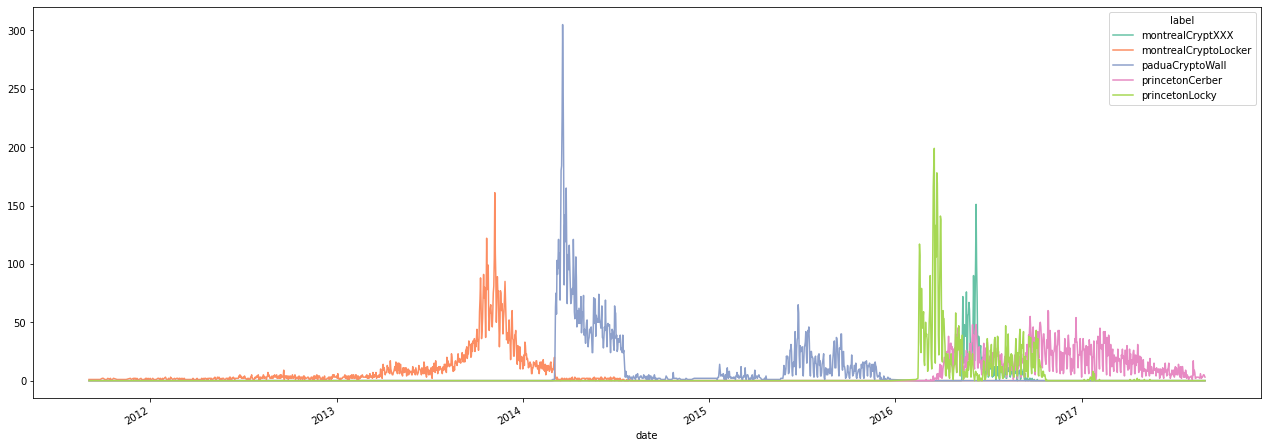

In [15]:
terror_region = pd.crosstab(common_ransom_df.date, common_ransom_df.label)
terror_region.plot(color = sns.color_palette('Set2',12))
fig = plt.gcf()
fig.set_size_inches(22,8)
plt.show()

In [24]:
#mean vector of features
grouped_heist = common_ransom_df.groupby('label')
mean_df = grouped_heist.mean()
mean_df

,year,day,length,weight,counted,looped,neighbors,income
label,,,,,,,,
montrealCryptXXX,2016.000000,168.033485,47.447706,0.367505,791.848284,61.022323,2.011988,1.355343e+08
montrealCryptoLocker,2013.022544,240.618787,30.674396,0.888878,308.328824,100.981535,2.885346,1.840825e+09
paduaCryptoWall,2014.260936,141.853511,47.926554,0.790989,425.868281,121.013882,2.000404,7.016105e+08
princetonCerber,2016.344790,182.390545,39.908273,0.316432,737.075355,54.406701,2.008023,1.032246e+08
princetonLocky,2016.006038,132.915472,46.905962,0.374109,1027.244528,88.647698,1.245736,2.444200e+08


In [25]:
median_df = grouped_heist.median()
median_df

,year,day,length,weight,counted,looped,neighbors,income
label,,,,,,,,
montrealCryptXXX,2016,160,14,0.235776,1,0,2,120000000.0
montrealCryptoLocker,2013,284,4,0.500000,1,0,2,200000000.0
paduaCryptoWall,2014,128,8,0.500000,2,0,1,204000000.0
princetonCerber,2016,171,8,0.133980,1,0,2,90000000.0
princetonLocky,2016,92,6,0.250000,1,0,1,200000000.0


## Explaratory Data Analysis

In [4]:
data.loc[data['label'] == 'white', 'blabel'] = 'white'
data.loc[data['label'] != 'white', 'blabel'] = 'heist'

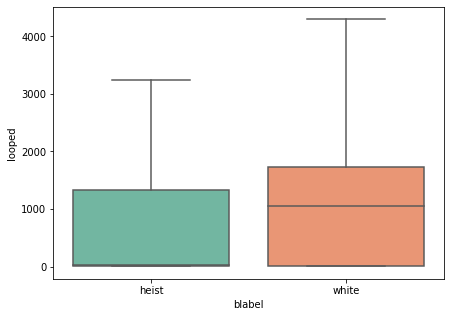

In [17]:
#length
plt.figure(figsize = (7, 5))
ax = sns.boxplot(x = 'blabel', y = 'looped', data = data.loc[(data['year'].isin([2013, 2014]))&(data['looped'] >0)], 
                 palette = 'Set2', showfliers = False)

/Users/Sharonvy/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Sharonvy/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Sharonvy/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

(30000000.0, 49964398238996.0)

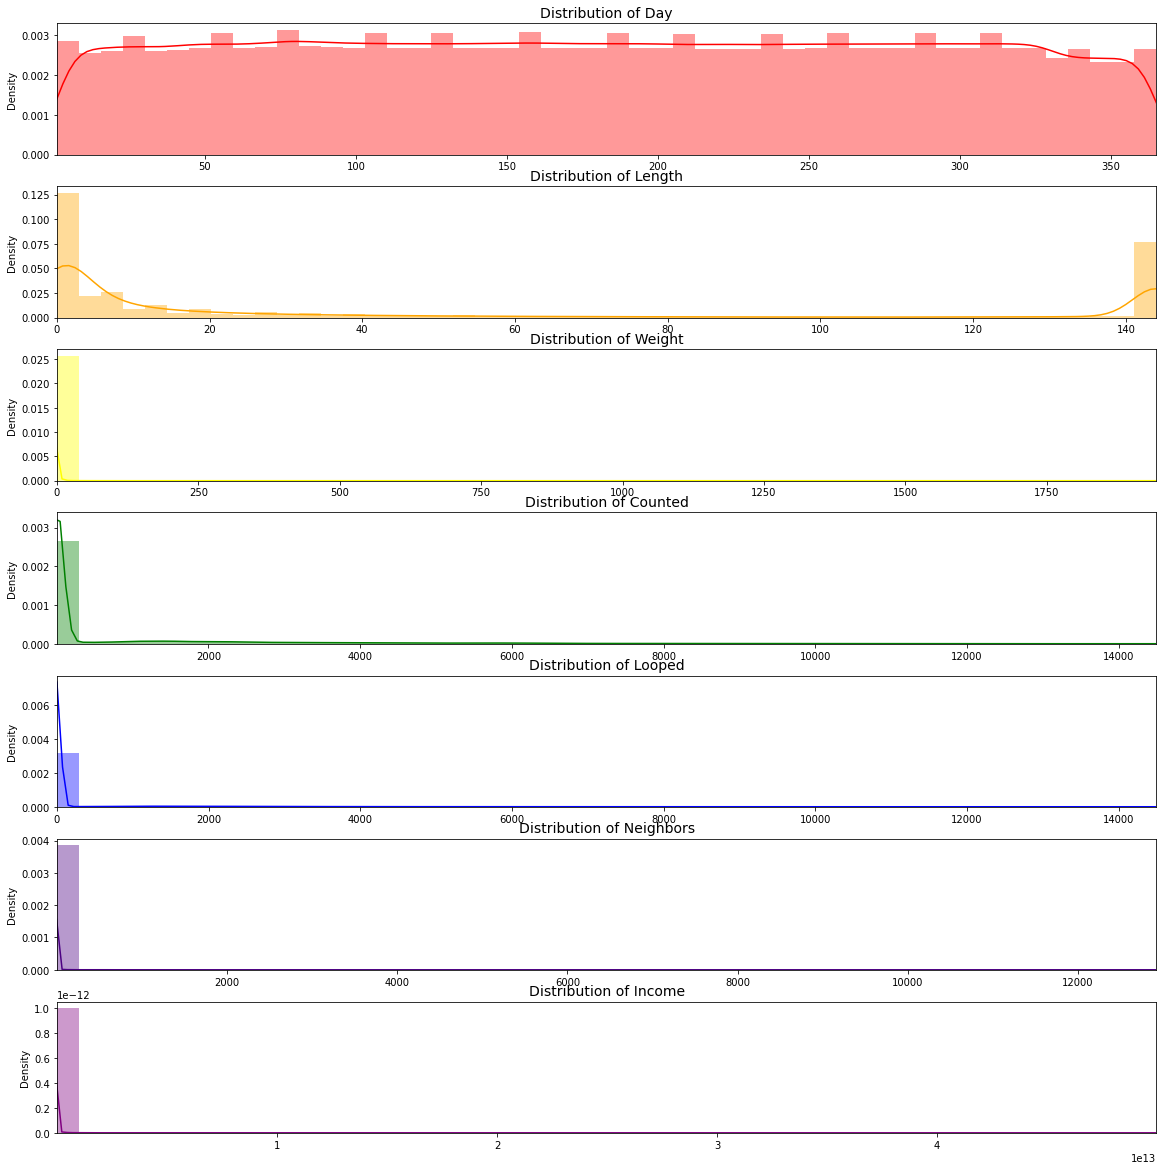

In [30]:
fig, ax = plt.subplots(7, 1,figsize=(16,16))
fig.tight_layout()

day_val = data.day.values
length_val = data.length.values
weight_val = data.weight.values
counted_val = data.counted.values
looped_val = data.looped.values
neighbors_val = data.neighbors.values
income_val = data.income.values

sns.distplot(day_val, ax=ax[0],color='red')
ax[0].set_title('Distribution of Day', fontsize=14)
ax[0].set_xlim([min(day_val), max(day_val)])

sns.distplot(length_val, ax=ax[1],color='orange')
ax[1].set_title('Distribution of Length', fontsize=14)
ax[1].set_xlim([min(length_val), max(length_val)])

sns.distplot(weight_val, ax=ax[2],color='yellow')
ax[2].set_title('Distribution of Weight', fontsize=14)
ax[2].set_xlim([min(weight_val), max(weight_val)])

sns.distplot(counted_val, ax=ax[3],color='green')
ax[3].set_title('Distribution of Counted', fontsize=14)
ax[3].set_xlim([min(counted_val), max(counted_val)])

sns.distplot(looped_val, ax=ax[4],color='blue')
ax[4].set_title('Distribution of Looped', fontsize=14)
ax[4].set_xlim([min(looped_val), max(looped_val)])

sns.distplot(neighbors_val, ax=ax[5],color='indigo')
ax[5].set_title('Distribution of Neighbors', fontsize=14)
ax[5].set_xlim([min(neighbors_val), max(neighbors_val)])

sns.distplot(income_val, ax=ax[6],color='purple')
ax[6].set_title('Distribution of Income', fontsize=14)
ax[6].set_xlim([min(income_val), max(income_val)])

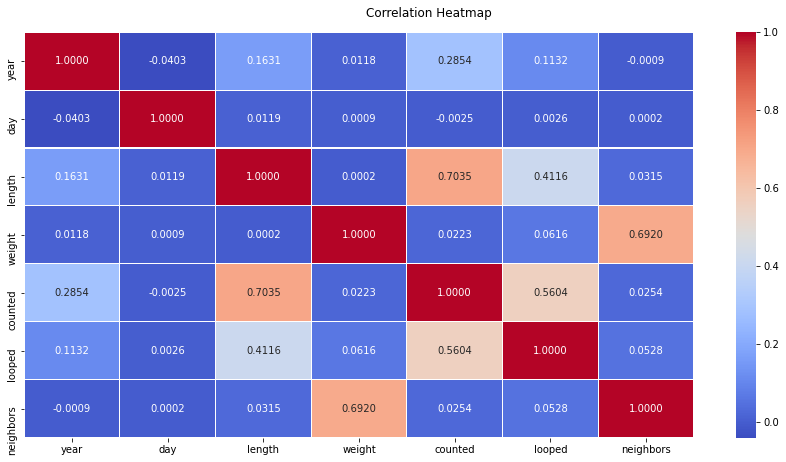

In [33]:
#correlation heatmap
fig, ax = plt.subplots(figsize = (15,7))
var_list = data.columns[1:-2]
corr = data[var_list].corr()
hm = sns.heatmap(round(corr, 4), annot = True, ax = ax, cmap = 'coolwarm', fmt = '.4f', linewidths = 0.05)
fig.subplots_adjust(top = 0.93)
t = fig.suptitle('Correlation Heatmap')

## Two-sample Hotelling T-squared Test
By definition, Hotelling's two-sample $T^2$ test statistics is given by 
$$T^2 = (\bar{x}_1-\bar{x}_2)^T\left(S_p\left(\frac{1}{n_1}+\frac{1}{n_2}\right)\right)^{-1}(\bar{x}_1-\bar{x}_2)$$
where $S_p = \dfrac{(n_1-1)S_1+(n_2-1)S_2}{n_1+n_2-2}$. Hence, it has a distribution of 
$$T^2\sim \frac{(n-2)p}{n-p-1}F_{p,n-p-1}(\sigma^2)$$
where $\sigma^2 = \frac{n_1n_2}{n_1+n_2}(\mu_1 - \mu_2)'\Sigma^{-1}(\mu_1 - \mu_2)$. Therefore, we can use the F-test function from scipy.stats to generate the Hotelling's two-sample $T^2$ test statistic and the p-value.

In [34]:
def TwoSampleT2Test(X, Y):
    """
    Args: 
        X: first sample dataset
        Y: second sample dataset
    
    Return:
        Hotelling T^2 Statistics for two sample test and p-value
    """
    nx, p = X.shape
    ny, _ = Y.shape
    delta = np.mean(X, axis=0) - np.mean(Y, axis=0)
    Sx = np.cov(X, rowvar=False)
    Sy = np.cov(Y, rowvar=False)
    S_pooled = ((nx-1)*Sx + (ny-1)*Sy)/(nx+ny-2)
    t_squared = (nx*ny)/(nx+ny) * np.matmul(np.matmul(delta.transpose(), np.linalg.inv(S_pooled)), delta)
    statistic = t_squared * (nx+ny-p-1)/(p*(nx+ny-2))
    F = f(p, nx+ny-p-1)
    p_value = 1 - F.cdf(statistic)
    print(f"Test statistic: {statistic}\nDegrees of freedom: {p} and {nx+ny-p-1}\np-value: {p_value}")
    return statistic, p_value

In [33]:
X_white = white.iloc[:,3:9]
X_heist = heist.iloc[:,3:9]

In [35]:
stats, p_val = TwoSampleT2Test(X_white, X_heist)

Test statistic: 171.73626543191156
Degrees of freedom: 6 and 2916690
p-value: 1.1102230246251565e-16


In [36]:
#compare with two sample t-test on single variable
columns = X_white.columns
for c in columns:
    print(c)
    t_stats, t_pval = ttest_ind(X_white[[c]], X_heist[[c]], equal_var = False)
    print("Test statistic:", t_stats[0])
    print("P-value:", t_pval[0])

length
Test statistic: 11.823138264355094
P-value: 3.328430970102434e-32
weight
Test statistic: -6.254970295723609
P-value: 4.0126231877771425e-10
counted
Test statistic: 17.53363295296858
P-value: 1.3734887433131509e-68
looped
Test statistic: 55.005845085137075
P-value: 0.0
neighbors
Test statistic: 8.316016492833114
P-value: 9.180211425559307e-17
income
Test statistic: 31.308190879697257
P-value: 7.429031091794631e-215
